In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/oil-spill-detection/oil_spill.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/oil-spill-detection/oil_spill.csv')
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

In [4]:
df.isna().sum()

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

In [5]:
X = df.drop(labels=['target'],axis=1)
Y = df[['target']]

In [6]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
Xnew = pd.DataFrame(mm.fit_transform(X),columns=X.columns)

In [7]:
Xnew.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49
0,0.000000,0.078693,0.795369,0.167291,0.500000,0.088774,0.319870,0.295893,0.181873,0.236111,...,0.638298,0.238507,0.086957,0.079550,0.077489,0.048675,0.0,0.587669,0.976721,0.222222
1,0.002849,0.689181,0.040816,0.308430,1.000000,0.782405,0.486482,0.015926,0.382532,0.000000,...,0.638298,0.481199,1.000000,1.000000,0.943179,0.007830,0.0,0.932995,0.976393,0.046729
2,0.005698,0.003243,0.765631,0.223027,0.488889,0.003048,0.312378,0.272842,0.016699,0.222222,...,0.638298,0.117161,0.021739,0.015636,0.025816,0.121754,1.0,0.558460,0.979016,0.210800
3,0.008547,0.036783,0.825213,0.108185,0.366667,0.041157,0.344625,0.299246,0.108469,0.236111,...,0.638298,0.505595,0.066224,0.047241,0.082929,0.173953,1.0,0.671567,0.974426,0.234683
4,0.011396,0.009327,0.501465,0.161501,0.205556,0.009961,0.328827,0.259849,0.016761,0.208333,...,0.638298,0.110470,0.061794,0.053426,0.062444,0.033668,0.0,0.508444,0.974098,0.159917


In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21,
                                                stratify = Y)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
nn = Sequential()
nn.add(Dense(64,input_dim=xtrain.shape[1],activation='relu'))
nn.add(Dropout(0.1))
nn.add(Dense(64,activation='relu'))
nn.add(Dropout(0.1))
nn.add(Dense(64,activation='relu'))
nn.add(Dropout(0.1))
nn.add(Dense(64,activation='relu'))
nn.add(Dropout(0.1))
nn.add(Dense(1,activation='sigmoid'))

2022-12-13 13:02:19.689158: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3200      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4

In [11]:
nn.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
nn.fit(xtrain, ytrain, validation_data = (xtest,ytest), batch_size=32,epochs=25)

Epoch 1/25


2022-12-13 13:02:19.950444: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


24/24 [==============================] - 1s 15ms/step - loss: 0.3177 - accuracy: 0.9546 - val_loss: 0.2054 - val_accuracy: 0.9574
Epoch 2/25
24/24 [==============================] - 0s 5ms/step - loss: 0.1943 - accuracy: 0.9559 - val_loss: 0.1702 - val_accuracy: 0.9574
Epoch 3/25
24/24 [==============================] - 0s 5ms/step - loss: 0.1812 - accuracy: 0.9559 - val_loss: 0.1595 - val_accuracy: 0.9574
Epoch 4/25
24/24 [==============================] - 0s 5ms/step - loss: 0.1734 - accuracy: 0.9559 - val_loss: 0.1515 - val_accuracy: 0.9574
Epoch 5/25
24/24 [==============================] - 0s 5ms/step - loss: 0.1673 - accuracy: 0.9559 - val_loss: 0.1436 - val_accuracy: 0.9574
Epoch 6/25
24/24 [==============================] - 0s 5ms/step - loss: 0.1548 - accuracy: 0.9559 - val_loss: 0.1370 - val_accuracy: 0.9574
Epoch 7/25
24/24 [==============================] - 0s 5ms/step - loss: 0.1574 - accuracy: 0.9559 - val_loss: 0.1187 - val_accuracy: 0.9574
Epoch 8/25
24/24 [============

In [12]:
tr_pred = nn.predict(xtrain)
ts_pred = nn.predict(xtest)

In [13]:
tr_predclass = []
for i in tr_pred:
    if i>0.5:
        tr_predclass.append(1)
    else:
        tr_predclass.append(0)

In [14]:
ts_predclass = []
for i in ts_pred:
    if i>0.5:
        ts_predclass.append(1)
    else:
        ts_predclass.append(0)

In [15]:
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_predclass)
ts_acc = accuracy_score(ytest,ts_predclass)
print('Training accuracy is : ',round(tr_acc,6))
print('Testing accuracy is  : ',round(ts_acc,6))

Training accuracy is :  0.975968
Testing accuracy is  :  0.973404


In [16]:
from sklearn.metrics import classification_report
cr = classification_report(ytest,ts_predclass)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       180
           1       0.64      0.88      0.74         8

    accuracy                           0.97       188
   macro avg       0.82      0.93      0.86       188
weighted avg       0.98      0.97      0.98       188



<AxesSubplot:>

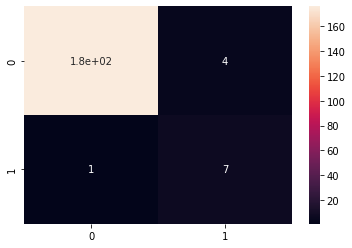

In [17]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ts_predclass)
import seaborn as sb
sb.heatmap(cf,annot=True)